# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

### 之前做過的處理 (參考作業10)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [20]:
# 分析收入與還款能力
sub_df = app_train.loc[:,['AMT_INCOME_TOTAL']]/10000
sub_df.describe()
#總共 : 約30萬七千筆
#平均收入為 : 16萬元

,AMT_INCOME_TOTAL
count,307511.000000
mean,16.879792
std,23.712315
min,2.565000
25%,11.250000
50%,14.715000
75%,20.250000
max,11700.000000


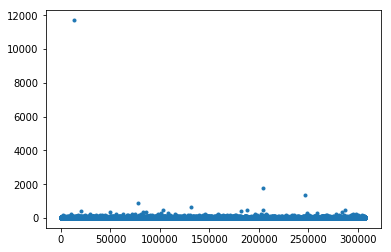

In [16]:
plt.plot(sub_df,'.')
# y 軸為收入, x 軸為人數

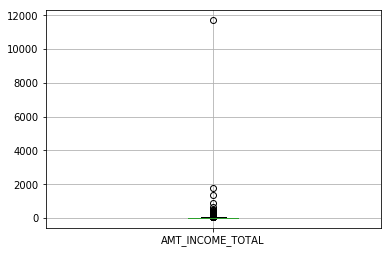

In [17]:
sub_df.boxplot()
#有一人的收入特別高，不過因為離散化的關係，可以減弱outlier的影響

In [46]:
sub_df1 = sub_df[sub_df['AMT_INCOME_TOTAL'] !=11700.000000]
sub_df1.head()
sub_df1.describe()

,AMT_INCOME_TOTAL
count,307510.000000
mean,16.841799
std,10.881181
min,2.565000
25%,11.250000
50%,14.715000
75%,20.250000
max,1800.009000


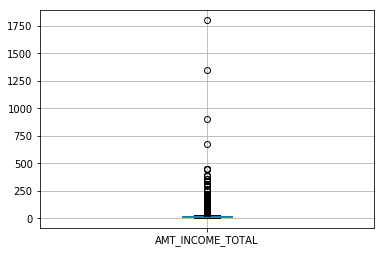

In [22]:
sub_df1.boxplot()

   AMT_INCOME_TOTAL  AMT_INCOME_TOTAL_log  TARGET
0             20.25              1.306425       1
1             27.00              1.431364       0
2              6.75              0.829304       0
3             13.50              1.130334       0
4             12.15              1.084576       0


D:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


count    307510.000000
mean          1.172107
std           0.212267
min           0.409087
25%           1.051153
50%           1.167760
75%           1.306425
max           3.255275
Name: AMT_INCOME_TOTAL_log, dtype: float64

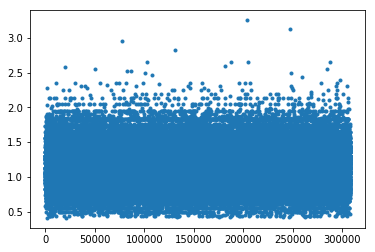

In [48]:
# 取log
sub_df1['AMT_INCOME_TOTAL_log'] = np.log10(sub_df1['AMT_INCOME_TOTAL'])
sub_df1['TARGET'] = app_train['TARGET']
print(sub_df1.head())
plt.plot(sub_df1['AMT_INCOME_TOTAL_log'],'.')
sub_df1['AMT_INCOME_TOTAL_log'].describe()

In [49]:
cut_rule = [0,0.5,1,1.5,2,2.5,3,3.5]
sub_df1['customized_income_grp'] = pd.cut(sub_df1['AMT_INCOME_TOTAL_log'].values,cut_rule)
sub_df1['customized_income_grp'].value_counts()
print(sub_df1.head())

   AMT_INCOME_TOTAL  AMT_INCOME_TOTAL_log  TARGET customized_income_grp
0             20.25              1.306425       1            (1.0, 1.5]
1             27.00              1.431364       0            (1.0, 1.5]
2              6.75              0.829304       0            (0.5, 1.0]
3             13.50              1.130334       0            (1.0, 1.5]
4             12.15              1.084576       0            (1.0, 1.5]


D:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
sub_df1.sort_values('AMT_INCOME_TOTAL')['customized_income_grp'].unique()

[(0.0, 0.5], (0.5, 1.0], (1.0, 1.5], (1.5, 2.0], (2.0, 2.5], (2.5, 3.0], (3.0, 3.5]]
Categories (7, interval[float64]): [(0.0, 0.5] < (0.5, 1.0] < (1.0, 1.5] < (1.5, 2.0] < (2.0, 2.5] < (2.5, 3.0] < (3.0, 3.5]]

畫KDE

D:\software\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\software\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


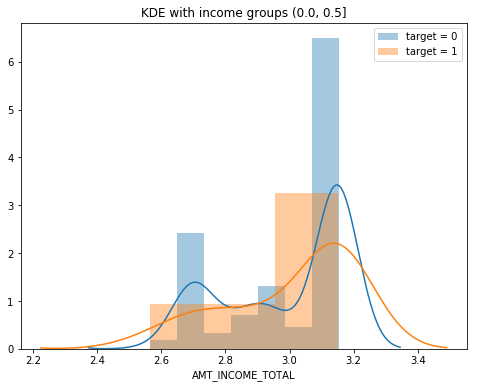

D:\software\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\software\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


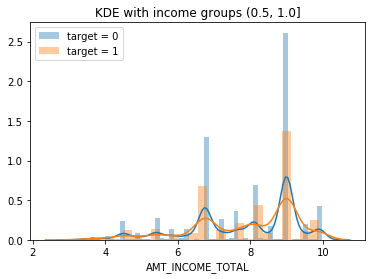

D:\software\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\software\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


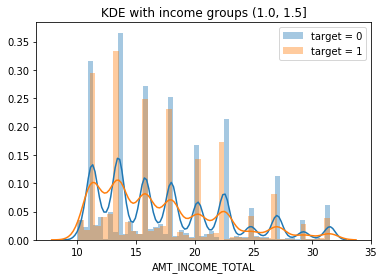

D:\software\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\software\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


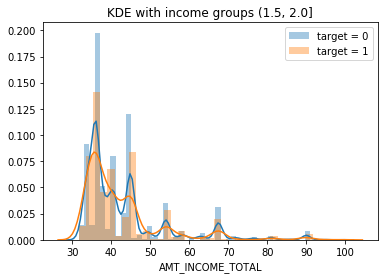

D:\software\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\software\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


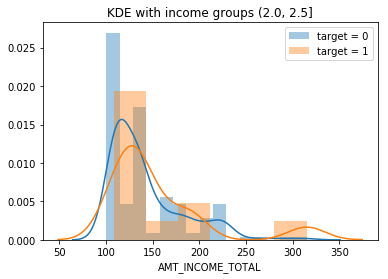

D:\software\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\software\Anaconda3\lib\site-packages\seaborn\distributions.py:195: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
D:\software\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\software\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\software\Anaconda3\lib\site-packages\numpy\lib\function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


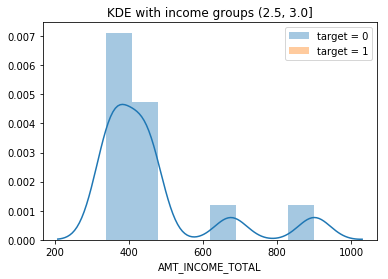

D:\software\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\software\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


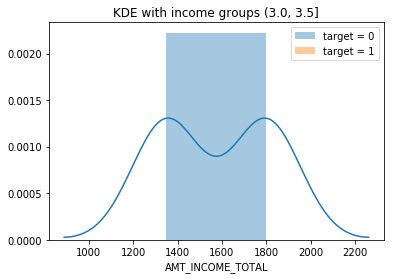

In [54]:
# 繪圖前先排序 / 分組
import seaborn as sns # 另一個繪圖-樣式套件
group_sorted = sub_df1.sort_values('AMT_INCOME_TOTAL')['customized_income_grp'].unique()

plt.figure(figsize=(8,6))
for i in range(len(group_sorted)):
    sns.distplot(sub_df1.loc[(sub_df1['customized_income_grp'] == group_sorted[i]) & \
                              (sub_df1['TARGET'] == 0), 'AMT_INCOME_TOTAL'], label = 'target = 0')
    
    sns.distplot(sub_df1.loc[(sub_df1['customized_income_grp'] == group_sorted[i]) & \
                              (sub_df1['TARGET'] == 1), 'AMT_INCOME_TOTAL'], label = 'target = 1')
    plt.title('KDE with income groups %s' %group_sorted[i])
    plt.legend()
    plt.show()

畫barplot:看起來是收入最低的那群以及收入較高的群比較會乖乖還款

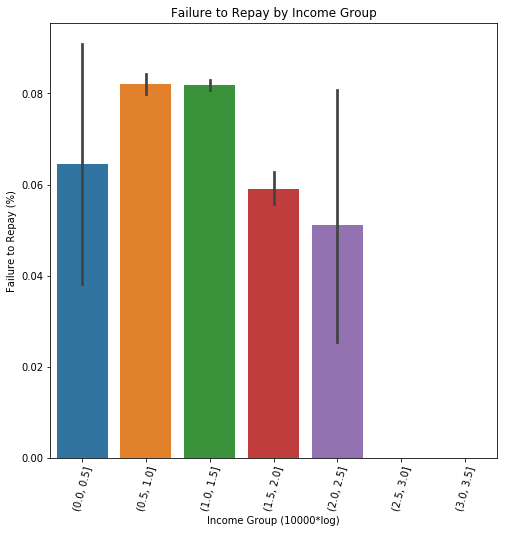

In [52]:
plt.figure(figsize = (8, 8))

# 以收入區間為 x, target 為 y 繪製 barplot

px = sub_df1['customized_income_grp']
py = sub_df1['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Income Group (10000*log)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Income Group');